In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import scikit_posthocs as sp
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

In [34]:
tests = {'mv_models_f1':'embed'}

In [35]:
name_models=['knn', 'rf', 'ab', 'cb', 'gb', 'mlp']

In [36]:
name_models=['knn', 'rf']

In [37]:
metrics=['rouge-1', 'rouge-2', 'rouge-l']

In [38]:
columns = [ "{}_{}".format(i,j) for i in name_models for j in metrics]

In [39]:
results = []
for num_test in range(1,31):
    
    for name_test, approach in tests.items():
        
        path_to_save = "/scratch/cinthiasouza/mv-text-summarizer/notebook/{}".format(name_test)
        result_comb = pd.read_csv("{}/test_{}/summaries/{}.csv".format(path_to_save, num_test, 'comb'))
                                  
        results.append(result_comb.describe().T['mean'])

In [40]:
df = pd.concat(results, axis=1).T

In [11]:
df.describe().T[['mean', 'std']]

,mean,std
knn_rouge-1,0.455790,2.258405e-16
knn_rouge-2,0.167076,0.000000e+00
knn_rouge-l,0.287406,2.258405e-16
rf_rouge-1,0.467260,1.562590e-03
rf_rouge-2,0.187720,1.478210e-03
rf_rouge-l,0.299805,1.183201e-03
ab_rouge-1,0.469739,1.693804e-16
ab_rouge-2,0.189274,2.823006e-17
ab_rouge-l,0.301486,2.258405e-16
gb_rouge-1,0.472384,2.258405e-16


In [28]:
aux.columns

Index(['knn_f2', 'rf_f2', 'ab_f2', 'gb_f2', 'cb_f2', 'kmlp_f2', 'knn_f1',
       'rf_f1', 'ab_f1', 'gb_f1', 'cb_f1', 'kmlp_f1', 'mlp_f1'],
      dtype='object')

In [41]:
for metric in metrics:
    
    print("\n\n Metric: {} \n\n".format(metric))
    
    knn =  df['knn_{}'.format(metric)].to_list()
    rf = df['rf_{}'.format(metric)].to_list()
    ab = df['ab_{}'.format(metric)].to_list()
    cb = df['cb_{}'.format(metric)].to_list()
    gb = df['gb_{}'.format(metric)].to_list()
    mlp = df['mlp_{}'.format(metric)].to_list()

    columns=['mlp_{}'.format(metric), 'knn_{}'.format(metric), 'rf_{}'.format(metric), 'ab_{}'.format(metric), 'cb_{}'.format(metric), 'gb_{}'.format(metric)]

    x = np.array([knn, rf, ab, cb, gb, mlp])

    print(stats.friedmanchisquare(knn, rf, ab, cb, gb, mlp))
    print("\n")

    result = sp.posthoc_nemenyi_friedman(x.T)
    print(result)
    print("\n")

    data = df[columns]
    result = autorank(data, alpha=0.05, verbose=False, approach='frequentist')

    print(create_report(result))
    print("\n")
    print(result)



 Metric: rouge-1 


FriedmanchisquareResult(statistic=118.51428571428573, pvalue=6.4769576459031926e-24)


          0         1         2         3         4         5
0  1.000000  0.203269  0.001000  0.128313  0.001000  0.512576
1  0.203269  1.000000  0.001000  0.001000  0.001000  0.001000
2  0.001000  0.001000  1.000000  0.267024  0.043566  0.043566
3  0.128313  0.001000  0.267024  1.000000  0.001000  0.900000
4  0.001000  0.001000  0.043566  0.001000  1.000000  0.001000
5  0.512576  0.001000  0.043566  0.900000  0.001000  1.000000




/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


The statistical analysis was conducted for 6 populations with 30 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the population mlp_rouge-1 (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and one of them is not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical distance CD=1.377 of the Nemenyi test.
We reject the null hypothesis (p=0.000) of the Friedman test that there is no difference 

/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/autorank/_util.py:112: RuntimeWarning: invalid value encountered in double_scalars
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/autorank/_util.py:112: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


The statistical analysis was conducted for 6 populations with 30 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the population rf_rouge-l (p=0.001). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and one of them is not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical distance CD=1.377 of the Nemenyi test.
We reject the null hypothesis (p=0.000) of the Friedman test that there is no difference i

/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/autorank/_util.py:112: RuntimeWarning: invalid value encountered in double_scalars
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/autorank/_util.py:112: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)


In [ ]:
rf_rouge-1   5.733333  0.456694  0.001771   0.45469  0.459743         0.0   
knn_rouge-1  4.633333  0.462248       0.0  0.462248  0.462248   -2.990885   
mlp_rouge-1  3.800000  0.463813  0.003444  0.448071  0.467976   -1.753285   
cb_rouge-1   3.433333  0.464461       0.0  0.464461  0.464461   -4.182489   
ab_rouge-1   2.400000  0.465835       0.0  0.465835  0.465835   -4.922717   
gb_rouge-1   1.000000  0.472396       0.0  0.472396  0.472396    -8.45608   


In [42]:
3.8-2.4

1.4

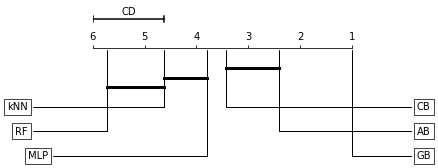

In [44]:
import matplotlib.pyplot as plt

# input data
cd = 1.376
knn = 4.63
mlp = 3.8
rf = 5.73
ab = 2.4
cb = 3.43
gb = 1
limits=(6,1)

fig, ax = plt.subplots(figsize=(6,1.8))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k") 
ax.text(limits[0]-cd/2., 0.92, "CD", ha="center", va="bottom") 

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")
ax.annotate("kNN", xy=(knn, 0.6), xytext=(-0.25,0),ha="right",  **kw)
ax.annotate("RF", xy=(rf, 0.6), xytext=(-0.25,-0.25),ha="right",  **kw)
ax.annotate("AB", xy=(ab, 0.6), xytext=(1.25, -0.25),ha="left",  **kw)
ax.annotate("CB", xy=(cb, 0.6), xytext=(1.25,0),ha="left",  **kw)
ax.annotate("GB", xy=(gb, 0.6), xytext=(1.25,-0.5),ha="left",  **kw)
ax.annotate("MLP", xy=(mlp, 0.6), xytext=(-0.25, -0.5),ha="left",  **kw)

#bars
ax.plot([knn, mlp],[0.3,0.3], color="k", lw=3)
ax.plot([knn,rf],[0.2,0.2], color="k", lw=3)
ax.plot([ab,cb],[0.4,0.4], color="k", lw=3)

plt.show()

In [33]:
10.733333 -  7.500000

3.233333

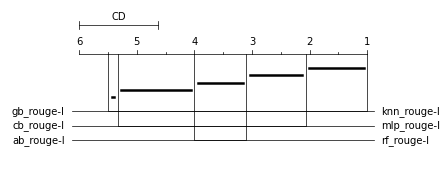

In [236]:
RankResult(rankdf=
          meanrank    median       mad  ci_lower  ci_upper effect_size  \
knn_f2   10.733333  0.455790       0.0   0.45579   0.45579         NaN   
kmlp_f2  10.533333  0.449594  0.011464   0.43198  0.464594    0.515537   
rf_f1    10.333333  0.456694  0.001771  0.454619  0.460298    -0.48722   
knn_f1    8.800000  0.462248       0.0  0.462248  0.462248        -inf   
mlp_f1    8.000000  0.463813  0.003444  0.445933  0.468473   -2.222105   
cb_f1     7.500000  0.464461       0.0  0.464461  0.464461        -inf   
ab_f1     6.333333  0.465835       0.0  0.465835  0.465835        -inf   
rf_f2     5.433333  0.467286   0.00093  0.466178  0.469365  -11.796801   
ab_f2     4.166667  0.469739       0.0  0.469739  0.469739        -inf   
cb_f2     3.100000  0.470998       0.0  0.470998  0.470998        -inf   
gb_f2     2.033333  0.472384       0.0  0.472384  0.472384        -inf   
gb_f1     1.033333  0.472396       0.0  0.472396  0.472396        -in

Critical difference (CD) diagram of the post-hoc Nemenyi test (α = 0.10). The difference between two algorithms is significant if the gap between their ranks is larger than CD. There is a line between two algorithms if the
rank gap between them is smaller than CD.

In [288]:
Critical difference diagram of the post-hoc Nemenyi test (\alpha = 0.5).  The difference between two algorithms is statisticamente significant if the gap between their ranks is larger than CD. There is a line between two algorithms if the rank gap between them is smaller than CD.

1.37

In [ ]:
RankResult(rankdf=
             meanrank      mean           std  ci_lower  ci_upper effect_size  \
rf_rouge-1   6.000000  0.454165  1.113028e-03  0.453589   0.45474         0.0   
knn_rouge-1  4.633333  0.474582  2.258405e-16  0.474582  0.474582  -25.941731   
mlp_rouge-1  4.366667  0.474940  1.146622e-03  0.474347  0.475533  -18.385839   
cb_rouge-1   3.000000  0.481768  3.952209e-16  0.481768  0.481768  -35.072329   
gb_rouge-1   2.000000  0.487850  2.823006e-16   0.48785   0.48785  -42.800694   
ab_rouge-1   1.000000  0.490332  1.693804e-16  0.490332  0.490332    -45.9542  